### Install dependencies

In [1]:
!pip install -q farasapy arabic-reshaper python-bidi --upgrade   

### Loading libraries

In [82]:
from farasa.pos import FarasaPOSTagger # for arabic pos
import networkx as nx  # draw networkx graph
import matplotlib.pyplot as plt
import arabic_reshaper # to restore arabic words form
from bidi.algorithm import get_display # display arabic words
import re
from matplotlib.pyplot import figure
import numpy as np
import random

seed = 42
random.seed(seed)
np.random.seed(seed)

### Getting POS Function

In [83]:
def get_pos(arabic_sentence):
    farasa_pos_tagger = FarasaPOSTagger() 
    pos_tags = farasa_pos_tagger.tag_segments(arabic_sentence, combine_subtokens = True) # get tags 

    G = nx.Graph() # initialize the graph

    for pos in pos_tags:
        for i in range(len(pos.tokens)):
            tag = pos.tags[i] # POS Tags

            word = pos.tokens[i] # words
            reshaped_word = arabic_reshaper.reshape(word)
            arword = get_display(reshaped_word)
            
            # Add nodes
            G.add_node(arword)
            G.add_node(tag)
    
            # Edge between word and POS tag
            G.add_edge(arword, tag)

    # specify the color of each node
    node_colors = {}
    for node in G:
        if re.search('[a-zA-Z]', node):
            node_colors[node] = 'green' # green for pos tags
        else: node_colors[node] = 'red' # red for words

    # specify the postion of the common pos tags
    pos = {
        "V": (1,5),
        "NOUN": (5,1),
        "DET": (10,5),
        "ADJ": (5,10),
        "PART": (1,10),
        "PREP": (10,1),
        "PRON": (10,15),
        "NSUFF": (15,10),
        "NUM": (15,15)
    }

    # display figure
    figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.3)
    nx.draw_networkx_nodes(G, pos, node_color = node_colors.values(), node_size = 400)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    plt.show()

### Testing

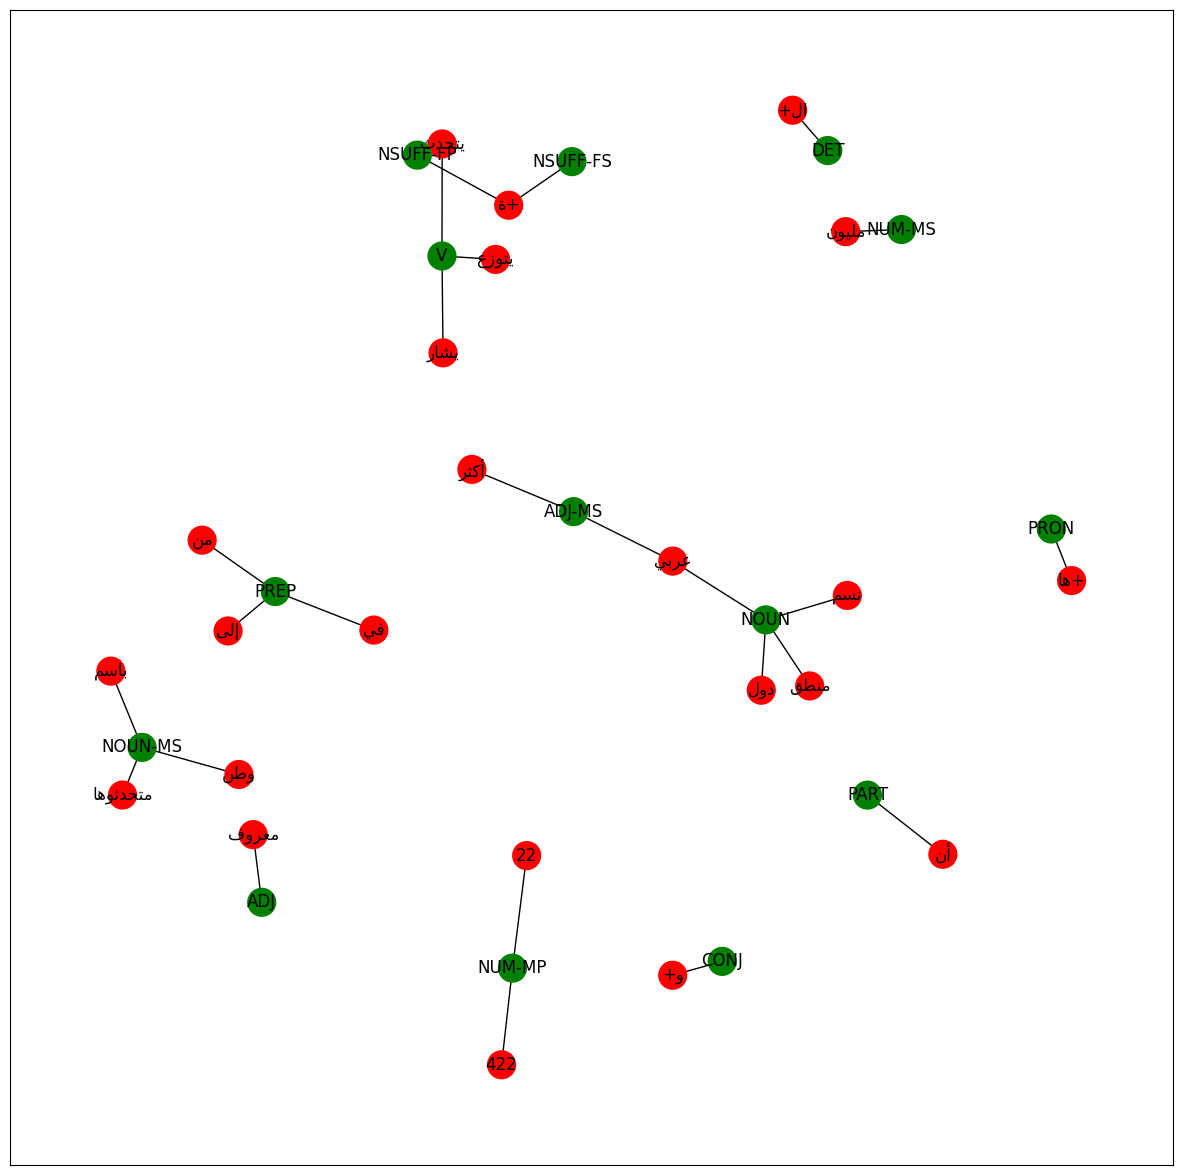

In [81]:
arabic_sentence = "يُشار إلى أن العربية يتحدثها أكثر من 422 مليون نسمة ويتوزع متحدثوها في المنطقة المعروفة باسم الوطن العربي فى اكثر من 22 دولة"
get_pos(arabic_sentence)